# User Flair Analysis

(no longer valid due to lack of data)

## Method

### Flair data
1. DONE - Q: Does r/asianamerican have flair templates? A: No, it is only customizable.
2. Decipher which ethnicity (Chinese, Japanese, Korean, Vietnamese, other) using flair text
- How should we deal with multi-ethnic flairs (Chinese-Thai, Korean/Black, etc)
- Looks like most of the comments with flair text are from a small subset of users with flairs who have commented numerous times
3. DONE - Flairs can contain up to 10 emojis, so can we use emojis to decipher ethnicity? A: Don't think we need emoji data, doesn't seem to be used very much.

#### Flair data EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
comments_df = pd.read_csv('../data/top_100_post_comments_user_flair.txt', header=None, names=['username', 'flair_text', 'body'])

In [6]:
print(comments_df.shape)
comments_df.head(10)

(3623, 3)


,username,flair_text,body
0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...
1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...
2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus..."
3,bad-fengshui,NaN,As with anything related to Asians in politics...
4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...
5,suberry,NaN,I just hated Affirmative Action as a distracti...
6,Puzzled-Painter3301,NaN,My own feeling is that I was never in love wit...
7,e9967780,NaN,Anti Asian racism whether against East Asians ...
8,NaN,NaN,Can we overturn legacy and athlete admissions ...
9,OkartoIceCream,NaN,"I want to remind people that in California, on..."


1. How many comments have flair text? A: Of 3623 rows, 3085 do NOT have flairs, 538 do have flairs
- Seems like we could use more data... but I'm not sure if there is more to collect
2. How many comments are by Chinese/Chinese-Americans flaired users?

In [7]:
print(comments_df.isnull().sum())

username       833
flair_text    3085
body             0
dtype: int64


In [3]:
# use find() to search the array of flair texts -- make the flair texts lowercase first
# substrings to find:
# Chinese: 'china', 'chines', 'abc'
# Korean: 'korea', 'kor', 'abk', 'gyopo'
# Japanese: 'jap', 'abj'
# Filipino: 'filip', "philppi", 'pinoy', 'abf', 'abp'
# Indian: 'indian', 'abi'
# South Asian: 'desi', 'south asia'

# Series of flair_text
flair_text = comments_df['flair_text']

# get rid of nan
flair_text_nona = flair_text.fillna(0)
flair_text_clean = flair_text_nona.str.lower()

#### Chinese flairs

In [4]:
# empty matrix to hold indices of substring
chine_matrix = np.empty((flair_text_clean.shape[0],3))

# each column is for a different type of identifying substring
chine_matrix[:,0] = flair_text_clean.str.find('china')
chine_matrix[:,1] = flair_text_clean.str.find('chines')
chine_matrix[:,2] = flair_text_clean.str.find('abc')

In [5]:
print(chine_matrix)
# row of nan is comment w/o flair

[[nan nan nan]
 [-1.  0. -1.]
 [nan nan nan]
 ...
 [-1. -1. -1.]
 [nan nan nan]
 [-1. -1. -1.]]


In [6]:
# change nan to -1 (no substring found)
chine_matrix_clean = np.nan_to_num(chine_matrix, nan=-1)
print(chine_matrix_clean)

[[-1. -1. -1.]
 [-1.  0. -1.]
 [-1. -1. -1.]
 ...
 [-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]]


In [8]:
# identify rows with one of the keywords (has value other than -1)
print(chine_matrix_clean != -1)
chine_rows = (chine_matrix_clean != -1).any(axis=1)

[[False False False]
 [False  True False]
 [False False False]
 ...
 [False False False]
 [False False False]
 [False False False]]


In [9]:
print(chine_rows.shape)
print(chine_rows.sum()) #97 comments of 3623 have Chinese flair


(3623,)
97


In [11]:
chi_comments_df = comments_df[chine_rows]
num_unique_users = len(pd.unique(chi_comments_df['username']))

print(f'Num of unique users with Chinese flair: {num_unique_users}')

Num of unique users with Chinese flair: 16


Chinese flair summary:
- 97 comments with Chinese flair
- 16 unique users with Chinese flair

#### Korean flairs

- Korean substrings: 'kor', 'abk', 'gyopo', 'hanguk'


In [12]:
# empty matrix to hold korean substring indices
kor_matrix = np.empty((flair_text_clean.shape[0],4))

kor_matrix[:,0] = flair_text_clean.str.find('kor')
kor_matrix[:,1] = flair_text_clean.str.find('abk')
kor_matrix[:,2] = flair_text_clean.str.find('gyopo')
kor_matrix[:,3] = flair_text_clean.str.find('hanguk')

In [13]:
# change nan to -1 (no flair to no substring found)
kor_matrix_clean = np.nan_to_num(kor_matrix, nan=-1)
print(kor_matrix_clean)

[[-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 ...
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]]


In [14]:
# identify rows with one of the keywords (has value other than -1)
print(kor_matrix_clean != -1)
kor_rows = (kor_matrix_clean != -1).any(axis=1)
print(kor_rows)

[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]
[False False False ... False False False]


In [15]:
print(kor_rows.shape)
print(kor_rows.sum()) # 12 comments of 3623 have Korean flair

# get indexes of Korean flair comments
#kor_idx = np.where(kor_rows==1)[0]
kor_comments_df = comments_df[kor_rows]

(3623,)
12


In [17]:
kor_comments_df = comments_df[kor_rows]
num_unique_kor_users = len(pd.unique(kor_comments_df['username']))
print(f'Num of unique users with Korean flair: {num_unique_kor_users}')

Num of unique users with Korean flair: 3


Korean flairs summary:
- 12 comments with Korean flair
- 3 unique users with Korean flair

# Topic Modeling

In [3]:
import pandas as pd
import numpy as np

# cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import nltk # for co-locations
import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

### 1. Get data

In [4]:
comments_df = pd.read_csv('../data/comments_df.csv')

Note: normalized_tokens column is string type, not list

In [5]:
normalized_tokens = comments_df['normalized_tokens'][0]
print(type(normalized_tokens))

<class 'str'>


In [6]:
from ast import literal_eval

def converter(x):
    return literal_eval(x)

comments_df = pd.read_csv('../data/comments_df.csv', converters={'tokens_new':converter, 'normalized_tokens':converter})

In [7]:
normalized_tokens = comments_df['normalized_tokens'][0]
tokens_new = comments_df['tokens_new'][0]
print(type(normalized_tokens))
print(type(tokens_new))

<class 'list'>
<class 'list'>


Token columns are now lists.

In [38]:
comments_df.head(10)

,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count
0,0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...,"[Thanks, to, everyone, who, engaged, in, insig...","[thank, engage, insightful, respectful, discou...",9,20
1,1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...,"[I, would, prefer, using, a, process, that, ta...","[prefer, process, take, account, poverty, inst...",52,103
2,2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus...","[u/Tungsten_,, Thanks, for, creating, a, secti...","[u/tungsten_,, thank, create, section, discuss...",126,269
3,3,bad-fengshui,NaN,As with anything related to Asians in politics...,"[As, with, anything, related, to, Asians, in, ...","[relate, asians, politic, m, see, lot, non, as...",25,59
4,4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...,"[Yet, colleges, will, allow, alumni, and, done...","[college, allow, alumnus, doner, easily, consi...",19,40
5,5,suberry,NaN,I just hated Affirmative Action as a distracti...,"[I, just, hated, Affirmative, Action, as, a, d...","[hate, affirmative, action, distraction, banda...",78,171
6,6,Puzzled-Painter3301,NaN,My own feeling is that I was never in love wit...,"[My, own, feeling, is, that, I, was, never, in...","[feeling, love, affirmative, action, possible,...",102,231
7,7,e9967780,NaN,Anti Asian racism whether against East Asians ...,"[Anti, Asian, racism, whether, against, East, ...","[anti, asian, racism, east, asians, south, asi...",21,46
8,8,NaN,NaN,Can we overturn legacy and athlete admissions ...,"[Can, we, overturn, legacy, and, athlete, admi...","[overturn, legacy, athlete, admission, point, ...",15,29
9,9,OkartoIceCream,NaN,"I want to remind people that in California, on...","[I, want, to, remind, people, that, in, Califo...","[want, remind, people, california, progressive...",104,200


Text has already been tokenized, lemmatized, normalized.

### 1.1 Collocations

In [51]:
comments_df.tail(5)

,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count,normalized_tokens_str
3618,3618,aduogetsatastegouda,NaN,But that's irrelevant. The right not to be dis...,"[But, that, 's, irrelevant, The, right, not, t...","[irrelevant, right, discriminate, base, race, ...",38,84,irrelevant right discriminate base race subjec...
3619,3619,rentonwong,Support Asian-American Media!,"Despite my dislike of AA, at least 2/3rds of A...","[Despite, my, dislike, of, AA, at, least, 2/3r...","[despite, dislike, aa, 2/3rds, asian, american...",19,32,despite dislike aa 2/3rds asian americans base...
3620,3620,rentonwong,Support Asian-American Media!,> If 1/3 of a racial minority's members say th...,"[>, If, 1/3, of, a, racial, minority, 's, memb...","[>, racial, minority, member, want, discrimina...",27,61,> racial minority member want discriminate ove...
3621,3621,NaN,NaN,I'm just annoyed at how there's so much handwa...,"[I, 'm, just, annoyed, at, how, there, 's, so,...","[m, annoyed, handwaving, consequence, pro, aa,...",48,117,m annoyed handwaving consequence pro aa anti a...
3622,3622,rentonwong,Support Asian-American Media!,The current system as it stands preserves whil...,"[The, current, system, as, it, stands, preserv...","[current, system, stand, preserve, privilege, ...",49,102,current system stand preserve privilege play m...


In [6]:
bigrams = nltk.collocations.BigramCollocationFinder.from_words(comments_df['normalized_tokens'].sum())
print(f'There are {bigrams.N} bigrams in the finder.')

There are 130955 bigrams in the finder.


Note: Why are there so many bigrams? 130955 of them?

In [61]:
def bigramScoring(count, wordsTuple, total):
    return count
bigrams.nbest(bigramScoring, 50)

[('affirmative', 'action'),
 ('asian', 'americans'),
 ('asian', 'american'),
 ('white', 'people'),
 ('high', 'school'),
 ('college', 'admission'),
 ('race', 'base'),
 ('asian', 'student'),
 ('legacy', 'admission'),
 ('test', 'score'),
 ('ivy', 'league'),
 ('white', 'student'),
 ('high', 'education'),
 ('black', 'hispanic'),
 ('support', 'affirmative'),
 ('black', 'people'),
 ('student', 'body'),
 ('asian', 'applicant'),
 ('model', 'minority'),
 ('black', 'latino'),
 ('chinese', 'americans'),
 ('middle', 'class'),
 ('supreme', 'court'),
 ('black', 'student'),
 ('asian', 'kid'),
 ('sit', 'score'),
 ('feel', 'like'),
 ('african', 'american'),
 ('admission', 'officer'),
 ('east', 'asians'),
 ('m', 'sure'),
 ('admission', 'process'),
 ('asian', 'people'),
 ('minority', 'group'),
 ('holistic', 'admission'),
 ('white', 'supremacy'),
 ('african', 'americans'),
 ('base', 'affirmative'),
 ('personality', 'score'),
 ('american', 'student'),
 ('elite', 'school'),
 ('low', 'income'),
 ('united', 's

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

***Come back to collocations and n-grams after finding out what role it would play:***
- Would some of the statistically significant n-grams be terms in the td-idf matrix?

### 2. CountVectorizer

First, before vectorizing, convert normalized_tokens column from list to string type

In [8]:
comments_df['normalized_tokens_str'] = comments_df['normalized_tokens'].apply(lambda x: ' '.join(item for item in x))

In [9]:
print(comments_df['normalized_tokens_str'][0])
comments_df.head(5)

thank engage insightful respectful discourse news thread lock comment


,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count,normalized_tokens_str
0,0,Tungsten_,NaN,Thanks to everyone who engaged in insightful a...,"[Thanks, to, everyone, who, engaged, in, insig...","[thank, engage, insightful, respectful, discou...",9,20,thank engage insightful respectful discourse n...
1,1,ProudBlackMatt,Chinese-American,I would prefer using a process that takes into...,"[I, would, prefer, using, a, process, that, ta...","[prefer, process, take, account, poverty, inst...",52,103,prefer process take account poverty instead ge...
2,2,TomatoCanned,NaN,"u/Tungsten_, Thanks for creating a section jus...","[u/Tungsten_,, Thanks, for, creating, a, secti...","[u/tungsten_,, thank, create, section, discuss...",126,269,"u/tungsten_, thank create section discuss read..."
3,3,bad-fengshui,NaN,As with anything related to Asians in politics...,"[As, with, anything, related, to, Asians, in, ...","[relate, asians, politic, m, see, lot, non, as...",25,59,relate asians politic m see lot non asian peop...
4,4,Pancake_muncher,NaN,Yet colleges will allow alumni and doners in e...,"[Yet, colleges, will, allow, alumni, and, done...","[college, allow, alumnus, doner, easily, consi...",19,40,college allow alumnus doner easily consider me...


In [10]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
count_vector = count_vectorizer.fit_transform(comments_df['normalized_tokens_str'])

In [11]:
print(count_vector.shape)

(3623, 10423)


- 3623 rows, 10425 columns/unique tokens

### 3. TD-IDF Vectorizer

In [12]:
tdidf_transformer = sklearn.feature_extraction.text.TfidfTransformer()
tdidf_vector = tdidf_transformer.fit_transform(count_vector)

In [13]:
list(zip(count_vectorizer.vocabulary_.keys(), tdidf_vector.data))[:20]

[('thank', 0.2790647239686926),
 ('engage', 0.2624916204470818),
 ('insightful', 0.4308677651786394),
 ('respectful', 0.2588701492057808),
 ('discourse', 0.3724050122335431),
 ('news', 0.4155587375062185),
 ('thread', 0.3355191219247845),
 ('lock', 0.3528365045862098),
 ('comment', 0.2282958742756067),
 ('prefer', 0.08961425241998294),
 ('process', 0.16812507837038776),
 ('take', 0.10333828523481878),
 ('account', 0.09791761829024669),
 ('poverty', 0.12307005687760202),
 ('instead', 0.11641353787807514),
 ('generation', 0.11641353787807514),
 ('family', 0.10922874743933599),
 ('come', 0.14501625345093178),
 ('america', 0.13812266943966214),
 ('painfully', 0.11936149821893847)]

### 4. Prune Matrix of features

In [14]:
#initialize
prune_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=3, max_features=1000, stop_words='english', norm='l2') # why norm=l2?
#train
pruned_vec = prune_vectorizer.fit_transform(comments_df['normalized_tokens_str'])

- min document freq=3 because low document frequency inflates td-idf
- An idea: visualize document freq of each word

In [15]:
pruned_vec

<3623x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 73451 stored elements in Compressed Sparse Row format>

Now, matrix is only 1000 terms/columns

In [16]:
# try to find term in matrix
termtofind = 'vector'
try:
    print(prune_vectorizer.vocabulary_[termtofind])
except KeyError:
    print(f'"{termtofind}" is missing')
    print('The available words are: {} ...'.format(list(prune_vectorizer.vocabulary_.keys())[:10]))

"vector" is missing
The available words are: ['thank', 'news', 'thread', 'comment', 'prefer', 'process', 'account', 'poverty', 'instead', 'generation'] ...


### 5. Flat Clustering with K-means

Silhouette method:

First let's initialize our PCA

In [17]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(pruned_vec.toarray())
reduced_data = pca.transform(pruned_vec.toarray())

Silhouette plot helper function:

In [28]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

    #ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # compute mean silhouette scores/coefficient over all samples
    silh_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute silhouette coefficient for each sample
    sample_silh_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        # get silh scores for cluster
        ith_cluster_silh_values = sample_silh_values[cluster_labels==i]
        ith_cluster_silh_values.sort()

        cluster_size = ith_cluster_silh_values.shape[0]
        y_upper = y_lower + cluster_size
        cmap = matplotlib.cm.get_cmap('nipy_spectral')
        color = cmap(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper), 0, ith_cluster_silh_values, facecolor=color, 
                          edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title('Silhoutte plot for each cluster')
    ax1.set_xlabel('Silhouette score')
    ax1.set_ylabel('Cluster label')

    ax1.axvline(x=silh_avg, color='red', linestyle='--')

    ax1.set_yticks([]) # clear y-axis label and ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # label clusters
    #centers = clusterer.cluster_centers_
    #projected_centers = pca.transform(centers)
    # draw white circles at cluster centers
    #ax2.scatter(projected_centers[:, 0], projected_centers[:, 1], marker='o', c='white', alpha=1, s=200)
    # write in cluster number in the centers
    #for i, c in enumerate(projected_centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
    
    ax2.set_title('Visual of clustered data')
    ax2.set_xlabel('PC 1')
    ax2.set_ylabel('PC 2')

    plt.suptitle(f'Silhouette analysis for KMeans clustering with n_clusters={n_clusters}', fontsize=14, fontweight='bold')
    plt.show()

    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silh_avg}")

    return cluster_labels

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


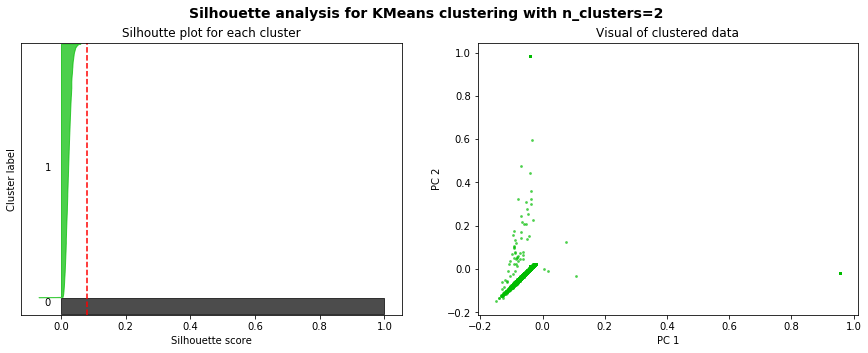

For n_clusters = 2, The average silhouette_score is : 0.08108862080065199


In [29]:
X = pruned_vec.toarray()
two_clusters_labels = plotSilhouette(2, X)

In [34]:
print(reduced_data.shape)
print(type(reduced_data))

#reduced_data[0:5,:]

outlier_idx = np.asarray(np.any(reduced_data > 0.9, axis=1)).nonzero()
outliers = comments_df.iloc[outlier_idx]

outliers.tail(40)


#possible_outliers = reduced_data[rows_greater, :]
#print(possible_outliers.shape)
#possible_outliers

(3623, 2)
<class 'numpy.ndarray'>


,Unnamed: 0,username,flair_text,body,tokens_new,normalized_tokens,normalized_tokens_count,word_count,normalized_tokens_str
3056,3056,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3058,3058,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3059,3059,NaN,NaN,[removed],[removed],[remove],1,1,remove
3060,3060,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3062,3062,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3063,3063,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3066,3066,NaN,NaN,[deleted],[deleted],[delete],1,1,delete
3068,3068,NaN,NaN,[removed],[removed],[remove],1,1,remove
3069,3069,NaN,NaN,[removed],[removed],[remove],1,1,remove
3070,3070,NaN,NaN,[deleted],[deleted],[delete],1,1,delete


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


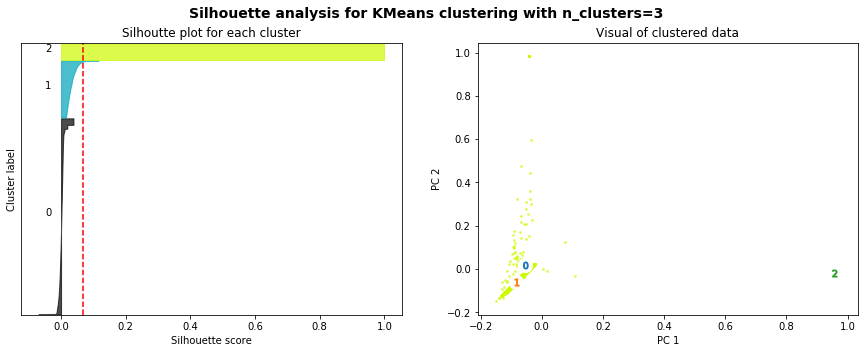

For n_clusters = 3, The average silhouette_score is : 0.06771132669992479


In [33]:
X = pruned_vec.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


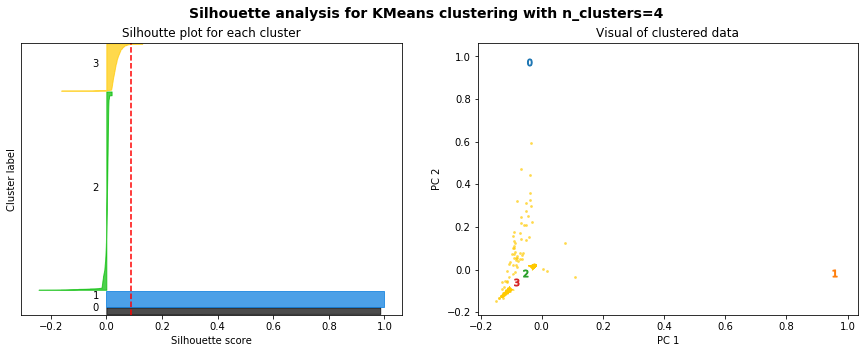

For n_clusters = 4, The average silhouette_score is : 0.09055360184459478


In [35]:
X = pruned_vec.toarray()
plotSilhouette(4, X)

Get num of points in each cluster. Need to investigate why some clusters look like there is 1 observation in it.